In [11]:
import pandas as pd # v 1.5.3
import numpy as np # v 1.21.5
import pmdarima as pm # v 1.8.5
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import pandas_profiling as pp # v 3.6.3
import warnings as ww
import statsmodels.tsa.stattools as stattools  # v 0.13.5
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

%matplotlib inline

# Task 1: Logistic Regression – Binary Classification

## 1. EDA

In [12]:
# read in the dataset
finance = pd.read_csv("/Users/tainguyen103/Downloads/loan_default_data_set.csv")

#show first 10 rows of dataset
finance.head(10) 

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
0,102956.11010,14819.057400,238,104,264,0,0,0,0.0,0,...,1,0,0.366737,0.342183,0.513934,0.550866,0,118266.32130,college,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.0,0,...,0,0,0.490809,0.540671,0.418016,NaN,0,89365.05765,college,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.0,0,...,0,0,0.359074,0.338560,0.341627,0.451417,0,201365.12130,college,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.0,2,...,1,0,0.700379,0.683589,0.542940,0.607843,0,191794.48550,college,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.0,0,...,0,0,0.647351,0.510812,0.632934,0.573680,0,161465.36790,graduate,0
5,83980.68793,8505.409715,250,178,255,1,0,0,0.0,0,...,0,0,0.602083,0.493298,0.697254,NaN,0,145392.18040,college,0
6,154508.47250,19626.364710,249,132,251,0,0,0,0.0,0,...,0,0,0.363827,0.515488,0.377024,0.444946,0,138870.57730,graduate,0
7,121591.04560,11143.193820,252,139,269,0,0,0,0.0,0,...,0,0,0.603348,0.685678,0.518624,0.650996,1,172338.97480,college,0
8,116267.28210,11572.646240,263,102,269,0,0,0,0.0,0,...,0,1,0.488049,0.399162,0.468299,NaN,0,156537.99710,college,0
9,144968.72430,18370.617010,328,169,328,0,0,0,0.0,0,...,0,0,0.519259,0.401434,0.532156,0.593617,1,171661.30630,high_school,0


In [13]:
#show last 10 rows of dataset
finance.tail(10) 

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,num_card_12_month,num_auto_ 36_month,uti_open_card,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind
19990,109331.52110,14733.488490,279,147,278,0,0,0,0.000000,1,...,0,2,0.536290,0.450051,0.646805,0.547561,0,NaN,college,0
19991,139018.80920,16279.404630,223,113,223,0,0,0,0.000000,0,...,0,0,0.424803,0.434816,0.636746,0.520201,0,154807.90300,college,0
19992,118021.00220,17165.158580,330,172,328,0,0,0,0.000000,0,...,0,0,0.424491,0.499234,0.436534,0.483930,1,NaN,college,0
19993,123398.85340,12685.051170,410,219,411,0,0,0,0.000000,0,...,0,0,0.598732,0.341668,0.625128,0.601800,1,159783.36620,college,0
19994,99102.92799,11033.901590,222,119,259,0,0,0,0.000000,0,...,0,0,0.591720,0.681487,0.631201,0.660454,0,167343.82270,graduate,1
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0,0,0.535628,0.634712,0.527230,0.602345,0,NaN,high_school,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0,0,0.464774,0.450030,0.545108,NaN,1,NaN,high_school,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0,0,0.264544,0.340289,0.412155,NaN,0,157706.15810,college,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0,0,0.609226,0.582007,0.301612,0.697052,1,97387.97414,college,1
19999,107338.82070,7942.952546,325,195,302,0,0,0,0.000000,0,...,0,0,0.358067,0.435511,0.349246,NaN,0,165447.16380,college,0


In [14]:
#stats summary
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      20000 non-null  float64
 1   avg_bal_cards                    20000 non-null  float64
 2   credit_age                       20000 non-null  int64  
 3   credit_age_good_account          20000 non-null  int64  
 4   credit_card_age                  20000 non-null  int64  
 5   num_acc_30d_past_due_12_months   20000 non-null  int64  
 6   num_acc_30d_past_due_6_months    20000 non-null  int64  
 7   num_mortgage_currently_past_due  20000 non-null  int64  
 8   tot_amount_currently_past_due    20000 non-null  float64
 9   num_inq_12_month                 20000 non-null  int64  
 10  num_card_inq_24_month            20000 non-null  int64  
 11  num_card_12_month                20000 non-null  int64  
 12  num_auto_ 36_month

/var/folders/yv/rbjy2ldj4sz8gpjwrvqmdsym0000gn/T/ipykernel_22619/596733372.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


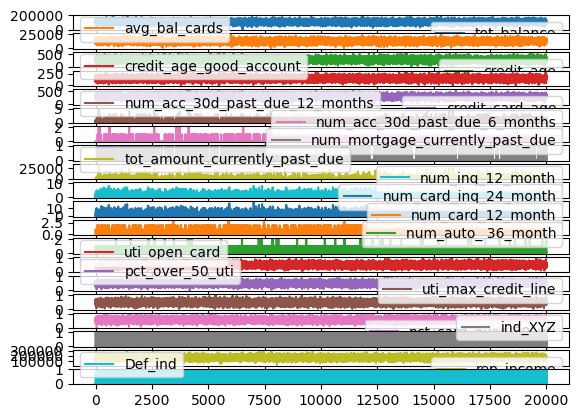

In [15]:
#variables plot
finance.plot(subplots=True)
plt.tight_layout()
plt.show()

In [16]:
#one step closer into education levels
finance["rep_education"].value_counts()

college        12137
high_school     5314
graduate        2406
other            142
Name: rep_education, dtype: int64

### We see that 'graduate' and other education level loaners are underpresented in the dataset, while college level loaners account for the majority of the dataset . 

In [17]:
# Group the Def_ind by education level
finance.groupby(['rep_education', 'Def_ind']).size()

rep_education  Def_ind
college        0          10960
               1           1177
graduate       0           2209
               1            197
high_school    0           4699
               1            615
other          0            131
               1             11
dtype: int64

### From basic computations, we obtain that 10.7% of college level, 8.9% graduate level, 13% high school level, and 8.3% other level loaners have default on loans in this dataset. Based on this, we can say that people with high school education level are more likely to default on loans

In [18]:
#find missing values in the dataset
finance.isna().sum()

tot_balance                           0
avg_bal_cards                         0
credit_age                            0
credit_age_good_account               0
credit_card_age                       0
num_acc_30d_past_due_12_months        0
num_acc_30d_past_due_6_months         0
num_mortgage_currently_past_due       0
tot_amount_currently_past_due         0
num_inq_12_month                      0
num_card_inq_24_month                 0
num_card_12_month                     0
num_auto_ 36_month                    0
uti_open_card                         0
pct_over_50_uti                       0
uti_max_credit_line                   0
pct_card_over_50_uti               1958
ind_XYZ                               0
rep_income                         1559
rep_education                         1
Def_ind                               0
dtype: int64

### It seems that we have missing values in three columns : pct_card_over_50_uti, rep_income, rep_education. Although it may not be the best option, we can resolve this by replacing the missing values by the mean value. For the rep_education variable, we'll perform two tasks: make dummy varibles to convert datatypes from object to numeric & remove the single missing value from the dataset since this will not significantly affect our data. 

In [19]:
#create dummy variables for rep_education
rep_education_dummies = pd.get_dummies(finance['rep_education'])
finance = pd.concat([finance, rep_education_dummies], axis=1)  

#remove mising value for rep_education
finance.dropna(subset=['rep_education'], inplace=True)
finance

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education,Def_ind,college,graduate,high_school,other
0,102956.11010,14819.057400,238,104,264,0,0,0,0.000000,0,...,0.513934,0.550866,0,118266.32130,college,0,1,0,0,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.000000,0,...,0.418016,NaN,0,89365.05765,college,0,1,0,0,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.000000,0,...,0.341627,0.451417,0,201365.12130,college,0,1,0,0,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.000000,2,...,0.542940,0.607843,0,191794.48550,college,0,1,0,0,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.000000,0,...,0.632934,0.573680,0,161465.36790,graduate,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0.527230,0.602345,0,NaN,high_school,0,0,0,1,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0.545108,NaN,1,NaN,high_school,0,0,0,1,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0.412155,NaN,0,157706.15810,college,0,1,0,0,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0.301612,0.697052,1,97387.97414,college,1,1,0,0,0


In [20]:
##find out which column has missing values, and replace with the mean
finance['pct_card_over_50_uti'].fillna(finance['pct_card_over_50_uti'].mean(), inplace=True)
finance['rep_income'].fillna(finance['rep_income'].mean(), inplace=True)

In [21]:
#check again. Data is now clear of missing values
finance.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
college                            0
graduate                           0
high_school                        0
other                              0
dtype: int64

In [22]:
#are the classes balanced?
finance["Def_ind"].value_counts()

0    17999
1     2000
Name: Def_ind, dtype: int64

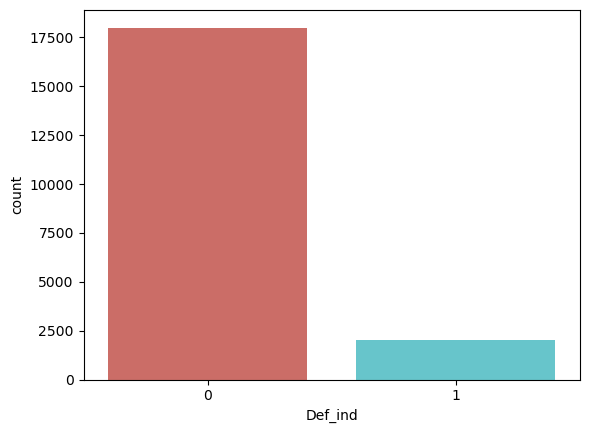

In [23]:
sns.countplot(x="Def_ind", data=finance, palette="hls")
plt.show()

### The ratio is roughly 9:1 for the two classes, which indicates that the classes are imbalanced in this dataset.

<Axes: xlabel='rep_income', ylabel='Count'>

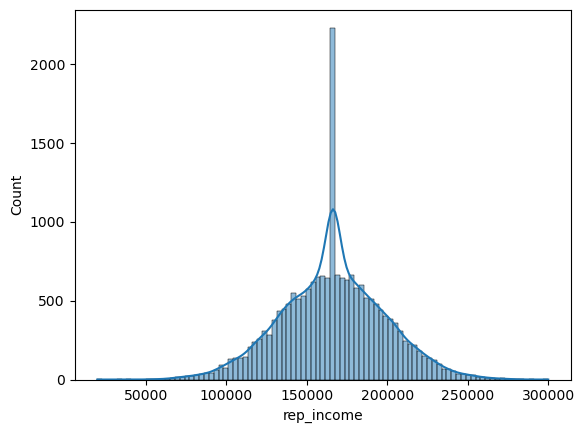

In [24]:
#the rep_income variable distribution
sns.histplot(data=finance, x='rep_income', kde=True)

### Disregarding the missing values which have already been handled by averaging, the rep_income seems to display a normal distribution. 

## 2. Separate data into training and testing set

In [25]:
y = finance["Def_ind"]
X = finance.drop(columns=["Def_ind", "rep_education"])  # drop rep_education since it is a string/object type 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

## 3. Fit the model and interpretation

In [26]:
# Create an instance of the logistic regression
model = LogisticRegression()

# Fit the classifier to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### This implies this logistic regression classifier model has a 90% accuracy level, which is good.

In [28]:
#print out report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3584
           1       0.67      0.08      0.14       416

    accuracy                           0.90      4000
   macro avg       0.78      0.54      0.54      4000
weighted avg       0.88      0.90      0.86      4000



### Precision is the ratio of correct positive predictions out of all positive predictions made that ranges between 0.0 for no precision and 1.0 for full or perfect precision.. We can see that the precision results are 0.90 and 0.67 for the two classes 0 and 1 respectively, which indicate a reasonably good value (for 0) but not outstanding (for 1).

### Unlike precision that only comments on the correct positive predictions out of all positive predictions, recall provides an indication of missed positive predictions. In this way, recall provides some notion of the coverage of the positive class. The result is a value between 0.0 for no recall and 1.0 for full or perfect recall. We see that class 0 has a 1.0 recall rate, which tells that the model predicts 100% examples correctly, meanwhile class 1 has a 0.08 recall rate - indicating that the model only predict 8% examples correctly.



## 4. Confusion matrix

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3568   16]
 [ 384   32]]


### This tells us that we have made 3568 + 32 = 3600 correct predictions and 384 + 16 = 400 incorrect predictions.

## 5. Plot ROC/AUC curve

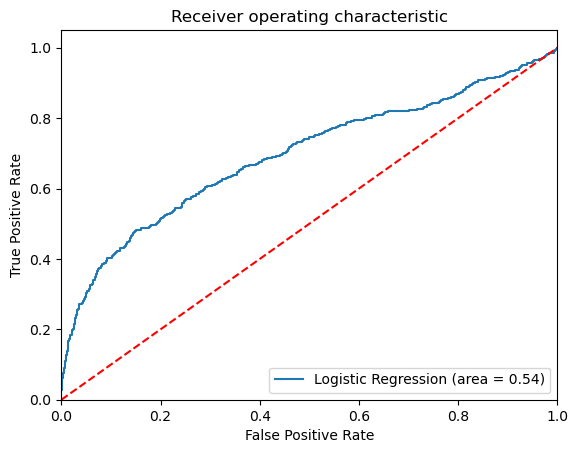

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### It is evident from the plot that the AUC for the Logistic Regression is higher than that for the ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset. 

# Task 2: Linear Discriminant Analysis (LDA) – Multiclass Classification

## 1.EDA 

In [31]:
# read in the dataset
mobile = pd.read_csv("/Users/tainguyen103/Downloads/mobile_phone_prices.csv")

#show first 10 rows of dataset
mobile.head(10) 

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [32]:
#show last 10 rows of dataset
mobile.tail(10) 

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,four_g,int_memory,mobile_depth,mobile_weight,number_of cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [33]:
#stats summary
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   bluetooth        2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   front_camera     2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   int_memory       2000 non-null   int64  
 7   mobile_depth     2000 non-null   float64
 8   mobile_weight    2000 non-null   int64  
 9   number_of cores  2000 non-null   int64  
 10  pc               2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  sc_h             2000 non-null   int64  
 15  sc_w             2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

/var/folders/yv/rbjy2ldj4sz8gpjwrvqmdsym0000gn/T/ipykernel_22619/1358971090.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


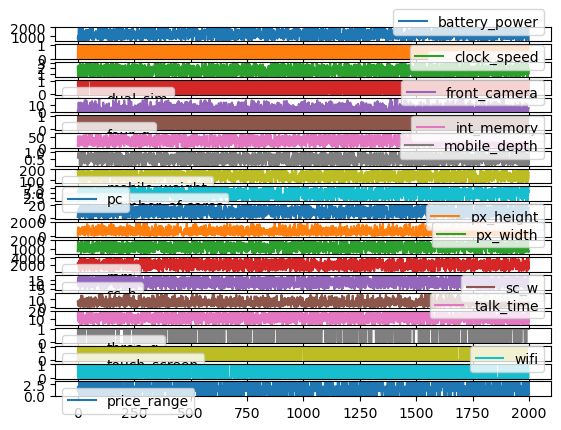

In [34]:
mobile.plot(subplots=True)
plt.tight_layout()
plt.show()

In [35]:
#find missing values in the dataset
mobile.isna().sum()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
front_camera       0
four_g             0
int_memory         0
mobile_depth       0
mobile_weight      0
number_of cores    0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

### Looks like the mobile dataset is clear of missing values, which means we can skip missing value handling part and move forward to other steps

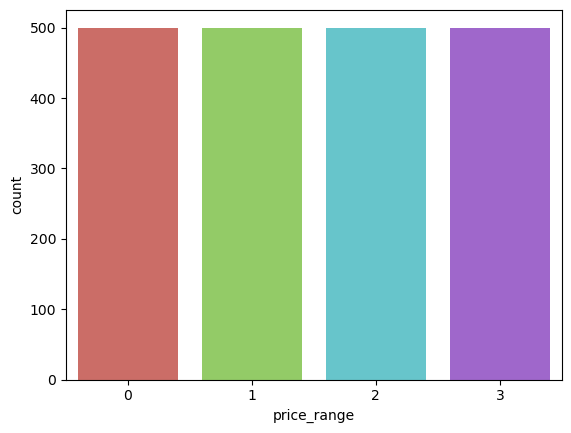

In [36]:
sns.countplot(x="price_range", data=mobile, palette="hls")
plt.show()

### We see that the samples distribute equally across 4 classes. Therefore, for the mobile dataset, the classes are balanced. 

## 2. Split data into testing and training sets

In [37]:
y = mobile["price_range"]
X = mobile.drop(columns=["price_range"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=0)

## 3. Fit the LDA model

In [38]:
# Create an instance of the logistic regression
model_LDA = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
model_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
# Make predictions on the testing data
y_pred = model_LDA.predict(X_test)

## 4. Report and interpret the accuracy, presicion, and recall

In [40]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


### This implies this logistic regression classifier model has a 95% accuracy level, which is good.

In [41]:
#print out report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.91      0.93      0.92       135
           2       0.91      0.93      0.92       151
           3       0.99      0.96      0.97       163

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



### Precision is the ratio of correct positive predictions out of all positive predictions made that ranges between 0.0 for no precision and 1.0 for full or perfect precision. We can see that the precision results for 4 classes are all relatively high, which indicate a nearly perfect value precision.

### Likely, we also see that recall values are reasonably good across 4 classes, which tells that the model predicts correctly a high percentage of examples. 

## 5. Confusion matrix

In [42]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

### This confusion matrix tells us that we have 147 + 126 + 140 + 156 = 569 correct predictions and 2 + 4 + 9 + 7 +7 + 2 = 31 incorrect predictions.
